In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }</style>'))

In [3]:
import os
import sys
stbl_root_path = os.path.abspath('..')
if stbl_root_path not in sys.path:
    print('inserting the following to path',stbl_root_path)
    sys.path.insert(0,os.path.abspath('..'))
    print(sys.path)

inserting the following to path /home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines
['/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines', '/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines/my_colabs', '/opt/anaconda3/envs/tf15/lib/python37.zip', '/opt/anaconda3/envs/tf15/lib/python3.7', '/opt/anaconda3/envs/tf15/lib/python3.7/lib-dynload', '', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages/IPython/extensions', '/home/gkoren2/.ipython']


In [4]:
import numpy as np
import tensorflow as tf
import gym
import pandas as pd
from my_zoo.utils.common import suppress_tensorflow_warnings, set_gpu_device
set_gpu_device('0')
suppress_tensorflow_warnings()
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib notebook

1 Physical GPUs, 1 Logical GPU
1.15.0


In [5]:
from stable_baselines.dbcq.dbcq import DBCQ
from stable_baselines.dbcq.expert_dataset import generate_experience_traj,load_experience_traj

In [6]:
data_path=os.path.join(os.path.expanduser('~'),'share/Data/MLA/L2P')
rl_data_path=os.path.join(os.path.expanduser('~'),'share/Data/MLA/stbl/erbufs')
print(data_path,rl_data_path)

/home/gkoren2/share/Data/MLA/L2P /home/gkoren2/share/Data/MLA/stbl/erbufs


# Draft experiment here

In [ ]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_csv-18-03-2020_10-24-21/1/model_params.zip'
model = DBCQ.load(model_file_name)

In [ ]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_data_rnd_RL.npz'
data=np.load(data_file_name,allow_pickle=True)
len(data['actions'])

In [ ]:
Y=data['actions']
X=data['obs']
X.shape

In [ ]:
y_pred=model.predict(X,deterministic=True)

In [ ]:
plt.hist(y_pred[0],bins=4)

## Train on L2_ww31_rnd_mnmxscaled.csv , test on L2_ww31_oracle_mnmxscaled.csv
we'll have to load it from csv

In [ ]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_ww31_rnd_csv_mnmx-22-03-2020_08-47-57/1/model_params.zip'
model = DBCQ.load(model_file_name)

In [26]:
data_file_name =  '/home/gkoren2/share/Data/MLA/L2P/L2_ww31_oracle_for_RL.csv'
# data=load_experience_traj(data_file_name)
# len(data['actions'])
df31=pd.read_csv(data_file_name,index_col=0)
df31.head(50)

,l2_prefetch_alloc,category_id,l2_hit,trace_phase,group_id,l2_useless_prefetch,category,ipc,trace,stall_l2m,stall_l1m,sq_occupancy
0,0.000375,1,0.003882,3d_raytrace_chakra_002_02_200000,0,0.0,agg3,4.381840,3d_raytrace_chakra_002_02,0.000000,0.002660,0.290084
1,0.000310,0,0.003864,3d_raytrace_chakra_002_02_200000,0,0.0,base,4.388933,3d_raytrace_chakra_002_02,0.000000,0.002611,0.272804
2,0.000250,2,0.003939,3d_raytrace_chakra_002_02_200000,0,0.0,con4,4.373650,3d_raytrace_chakra_002_02,0.000000,0.002831,0.173149
3,0.000190,3,0.003778,3d_raytrace_chakra_002_02_200000,0,0.0,con8,4.401007,3d_raytrace_chakra_002_02,0.001144,0.003530,0.153584
4,0.000120,1,0.002798,3d_raytrace_chakra_002_02_400000,1,0.0,agg3,4.626786,3d_raytrace_chakra_002_02,0.000000,0.000185,0.098932
5,0.000120,0,0.002774,3d_raytrace_chakra_002_02_400000,1,0.0,base,4.704997,3d_raytrace_chakra_002_02,0.000000,0.000247,0.072506
6,0.000120,2,0.002798,3d_raytrace_chakra_002_02_400000,1,0.0,con4,4.607739,3d_raytrace_chakra_002_02,0.000000,0.000230,0.071987
7,0.000105,3,0.002719,3d_raytrace_chakra_002_02_400000,1,0.0,con8,4.680705,3d_raytrace_chakra_002_02,0.000000,0.000211,0.069930
8,0.000680,1,0.008033,3d_raytrace_chakra_002_02_600000,2,0.0,agg3,4.093309,3d_raytrace_chakra_002_02,0.008737,0.012482,0.516187
9,0.000675,0,0.008253,3d_raytrace_chakra_002_02_600000,2,0.0,base,4.057422,3d_raytrace_chakra_002_02,0.008661,0.012241,0.520743


In [ ]:
Y=data['actions']
X=data['obs']
X.shape

In [ ]:
plt.plot(Y)

OK, the oracle's signal looks very artificial. its has a clear cyclic pattern. is that really an oracle ? there's no point in comparing to the oracle - only through the reward

In [ ]:
y_pred=model.predict(X,deterministic=True)

In [ ]:
# check accuracy
plt.hist(y_pred[0],bins=4)

## Train on L2_ww31_rnd.csv, test on L2_ww31_oracle.csv

In [ ]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g02-26-03-2020_12-46-50/1/model_params.zip'
model_g02 = DBCQ.load(model_file_name)

# model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g05-26-03-2020_12-48-05/1/model_params.zip'
# model_g05 = DBCQ.load(model_file_name)

# model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g09-26-03-2020_12-48-38/1/model_params.zip'
# model_g09 = DBCQ.load(model_file_name)

model=model_g02

In [ ]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_ww31_oracle.csv'
data=load_experience_traj(data_file_name)
len(data['actions'])

In [ ]:
Y2=data['actions']
X2=data['obs']
X2.shape

In [ ]:
y2_pred=model2.predict(X2,deterministic=True)

In [ ]:
plt.hist(y2_pred[0],bins=4)

# Test procedure
run the following to test the model on a given file

## running on all samples (raw oracle file)
use this section to run on the files that I get from Michal (without labels, all 4 states in each step)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
# load the file as you get it from Michal 
input_file = os.path.join(data_path,'michal','L2_data_random_for_RL_Batch.csv')
df=pd.read_csv(input_file,index_col=0)
df.head(50)

,trace_phase,trace,category,category_id,group_id,ipc,stall_l2m,stall_l1m,sq_occupancy,l2_prefetch_alloc,l2_useless_prefetch,l2_hit
0,3d_raytrace_chakra_002_02_200000,3d_raytrace_chakra_002_02,agg3,1,0,4.381840,0.000000,0.002660,0.290084,0.000375,0.0,0.003882
6,3d_raytrace_chakra_002_02_400000,3d_raytrace_chakra_002_02,con4,2,1,4.665478,0.000186,0.000420,0.027528,0.000020,0.0,0.002773
9,3d_raytrace_chakra_002_02_600000,3d_raytrace_chakra_002_02,base,0,2,4.114482,0.013627,0.013740,0.495579,0.000659,0.0,0.008277
12,3d_raytrace_chakra_002_02_800000,3d_raytrace_chakra_002_02,agg3,1,3,4.700343,0.000000,0.000035,0.025444,0.000035,0.0,0.002505
17,3d_raytrace_chakra_002_02_1000000,3d_raytrace_chakra_002_02,base,0,4,4.471893,0.004213,0.005890,0.146840,0.000230,0.0,0.004713
21,3d_raytrace_chakra_002_02_1200000,3d_raytrace_chakra_002_02,base,0,5,4.291042,0.000000,0.007238,0.353601,0.000530,0.0,0.008331
26,3d_raytrace_chakra_002_02_1400000,3d_raytrace_chakra_002_02,con4,2,6,4.570430,0.000194,0.000960,0.125999,0.000175,0.0,0.004174
29,3d_raytrace_chakra_002_02_1600000,3d_raytrace_chakra_002_02,base,0,7,4.457124,0.006630,0.008858,0.158193,0.000245,0.0,0.006265
32,3d_raytrace_chakra_002_02_1800000,3d_raytrace_chakra_002_02,agg3,1,8,4.166094,0.001884,0.010743,0.481785,0.000810,0.0,0.010939
38,3d_raytrace_chakra_002_02_2000000,3d_raytrace_chakra_002_02,con4,2,9,4.492233,0.011380,0.015623,0.266463,0.000310,0.0,0.006086


In [8]:
STATE_COLS = ['ipc', 'stall_l2m', 'stall_l1m', 'sq_occupancy', 'l2_prefetch_alloc', 'l2_useless_prefetch', 'l2_hit']

In [11]:
# Leakage : we need to use the scaling data from the training set. here we're shortcutting by fitting to test set
scaler = MinMaxScaler()
# scaler.fit(training_Set_data)
# scaler.transform(df[STATE_COLS])
X = scaler.fit_transform(df[STATE_COLS])
X.shape

(419752, 7)

In [13]:
# load the model to perform the predictions
# model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_csv-19-03-2020_17-36-39/1/model_params.zip'
# model = DBCQ.load(model_file_name)

model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g02-26-03-2020_12-46-50/1/model_params.zip'
model_g02 = DBCQ.load(model_file_name)
y_pred_g02=model_g02.predict(X,deterministic=True)[0]

model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g05-26-03-2020_12-48-05/1/model_params.zip'
model_g05 = DBCQ.load(model_file_name)
y_pred_g05=model_g05.predict(X,deterministic=True)[0]

model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g09-26-03-2020_12-48-38/1/model_params.zip'
model_g09 = DBCQ.load(model_file_name)
y_pred_g09=model_g09.predict(X,deterministic=True)[0]

y_pred=np.concatenate([y_pred_g02[:,None],y_pred_g05[:,None],y_pred_g09[:,None]],axis=1)

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


<IPython.core.display.Javascript object>


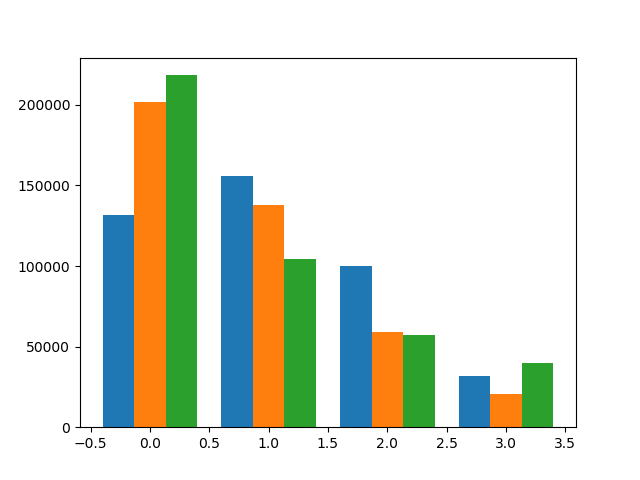

In [15]:
plt.hist(y_pred,bins=[b+0.5 for b in range(-1,4)])
plt.show()

In [ ]:
# perform the predictions
y_pred=model.predict(X,deterministic=True)
print(y_pred[0].shape)
plt.hist(y_pred[0],bins=[b+0.5 for b in range(-1,4)])

In [16]:
df['rl_pred_02']=y_pred_g02
df['rl_pred_05']=y_pred_g05
df['rl_pred_09']=y_pred_g09

In [17]:
df.head(50)

,trace,trace_phase,group_id,ipc,stall_l2m,stall_l1m,sq_occupancy,l2_prefetch_alloc,l2_useless_prefetch,l2_hit,rl_pred_02,rl_pred_05,rl_pred_09
0,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.381840,0.000000,0.002660,0.290084,0.000375,0.0,0.003882,0,0,0
1,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.388933,0.000000,0.002611,0.272804,0.000310,0.0,0.003864,0,0,0
2,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.373650,0.000000,0.002831,0.173149,0.000250,0.0,0.003939,0,0,0
3,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.401007,0.001144,0.003530,0.153584,0.000190,0.0,0.003778,1,0,0
4,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.665478,0.000186,0.000420,0.025274,0.000020,0.0,0.002773,1,1,0
5,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.665478,0.000186,0.000420,0.027942,0.000020,0.0,0.002773,1,1,0
6,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.665478,0.000186,0.000420,0.027528,0.000020,0.0,0.002773,1,1,0
7,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.665478,0.000186,0.000420,0.025604,0.000020,0.0,0.002773,1,1,0
8,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_600000,2,4.087475,0.013544,0.013554,0.540378,0.000695,0.0,0.008296,1,1,0
9,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_600000,2,4.114482,0.013627,0.013740,0.495579,0.000659,0.0,0.008277,1,1,0


In [19]:
output_file=os.path.splitext(input_file)[0]+'_RLpred.csv'
print("saving to "+output_file)
df.to_csv(output_file)

saving to /home/gkoren2/share/Data/MLA/L2P/L2_data_test_for_RL_Batch_RLpred.csv


## Analyzing processed oracle file (_best_path)
assume that we have a csv file that includes the best path extracted from oracle file in `<filename>_best_path.csv`   
we load this file as a test set:   
X is the `state_cols` and the labels are in `best_act` column in this file.  
the below cells load `X` and `y_true` and uses models to predict(X) and compares the predictions to `y_true`

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [8]:
state_cols = ['ipc', 'stall_l2m', 'stall_l1m', 'sq_occupancy', 'l2_prefetch_alloc', 'l2_useless_prefetch', 'l2_hit'] 
act_col='best_act'
in_filename = os.path.join(data_path,'L2_ww31_oracle_for_RL_best_path.csv')
bpdf=pd.read_csv(in_filename,index_col=0)
bpdf.head()

,ipc,stall_l2m,stall_l1m,sq_occupancy,l2_prefetch_alloc,l2_useless_prefetch,l2_hit,best_act
0,4.401007,0.001144,0.003530,0.153584,0.000190,0.0,0.003778,0
1,4.704997,0.000000,0.000247,0.072506,0.000120,0.0,0.002774,2
2,4.123519,0.009543,0.009574,0.358891,0.000555,0.0,0.008232,2
3,4.590390,0.000149,0.000482,0.048700,0.000100,0.0,0.002539,1
4,4.408222,0.000374,0.001905,0.155798,0.000280,0.0,0.004496,0


In [9]:
# Leakage : we need to use the scaling data from the training set. here we're shortcutting by fitting to test set
scaler = MinMaxScaler()
# scaler.fit(training_Set_data)
# scaler.transform(df[STATE_COLS])
y_true = bpdf[act_col].values
X = scaler.fit_transform(bpdf[state_cols])
print(X.shape,y_true.shape)

(98791, 7) (98791,)


In [10]:
# model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g02-26-03-2020_12-46-50/1/model_params.zip'
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_ww31_rnd_csv_g01-29-03-2020_18-15-48/1/model_params.zip'
model_g02 = DBCQ.load(model_file_name)
y_pred_g02=model_g02.predict(X,deterministic=True)[0]

# model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g05-26-03-2020_12-48-05/1/model_params.zip'
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_ww31_rnd_csv_g05-29-03-2020_18-19-18/1/model_params.zip'
model_g05 = DBCQ.load(model_file_name)
y_pred_g05=model_g05.predict(X,deterministic=True)[0]

# model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_g09-26-03-2020_12-48-38/1/model_params.zip'
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_ww31_rnd_csv_g09-29-03-2020_18-19-56/1/model_params.zip'
model_g09 = DBCQ.load(model_file_name)
y_pred_g09=model_g09.predict(X,deterministic=True)[0]

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [11]:
# evaluate each of the predictions using sklearn
cm02=confusion_matrix(y_true,y_pred_g02)
cm05=confusion_matrix(y_true,y_pred_g05)
cm09=confusion_matrix(y_true,y_pred_g09)

In [12]:
cm02

array([[ 2939,  5946,  2347,  4775],
       [10221, 13724,  9293,  4658],
       [ 3136,  8219,  2891,  5599],
       [ 2765, 10272,  3823,  8183]])

In [13]:
print(classification_report(y_true,y_pred_g02))

              precision    recall  f1-score   support

           0       0.15      0.18      0.17     16007
           1       0.36      0.36      0.36     37896
           2       0.16      0.15      0.15     19845
           3       0.35      0.33      0.34     25043

    accuracy                           0.28     98791
   macro avg       0.26      0.25      0.25     98791
weighted avg       0.28      0.28      0.28     98791



In [20]:
print(classification_report(y_true,y_pred_g02))

              precision    recall  f1-score   support

           0       0.18      0.30      0.22     16007
           1       0.57      0.47      0.51     37896
           2       0.25      0.39      0.31     19845
           3       0.56      0.20      0.29     25043

    accuracy                           0.36     98791
   macro avg       0.39      0.34      0.33     98791
weighted avg       0.44      0.36      0.37     98791



In [14]:
cm05

array([[ 5951,  6776,   740,  2540],
       [20705, 13781,   754,  2656],
       [ 6455,  9348,  1255,  2787],
       [ 5539, 12001,  3133,  4370]])

In [15]:
print(classification_report(y_true,y_pred_g05))

              precision    recall  f1-score   support

           0       0.15      0.37      0.22     16007
           1       0.33      0.36      0.35     37896
           2       0.21      0.06      0.10     19845
           3       0.35      0.17      0.23     25043

    accuracy                           0.26     98791
   macro avg       0.26      0.24      0.22     98791
weighted avg       0.28      0.26      0.25     98791



In [21]:
print(classification_report(y_true,y_pred_g05))

              precision    recall  f1-score   support

           0       0.17      0.48      0.25     16007
           1       0.44      0.36      0.40     37896
           2       0.24      0.22      0.23     19845
           3       0.57      0.11      0.19     25043

    accuracy                           0.29     98791
   macro avg       0.35      0.29      0.26     98791
weighted avg       0.39      0.29      0.29     98791



In [16]:
cm09

array([[ 6902,  7153,  1580,   372],
       [16276, 17762,  1663,  2195],
       [ 7175,  9450,  2865,   355],
       [ 6955, 11347,  6232,   509]])

In [17]:
print(classification_report(y_true,y_pred_g09))

              precision    recall  f1-score   support

           0       0.19      0.43      0.26     16007
           1       0.39      0.47      0.42     37896
           2       0.23      0.14      0.18     19845
           3       0.15      0.02      0.04     25043

    accuracy                           0.28     98791
   macro avg       0.24      0.27      0.22     98791
weighted avg       0.26      0.28      0.25     98791



In [22]:
print(classification_report(y_true,y_pred_g09))

              precision    recall  f1-score   support

           0       0.17      0.51      0.25     16007
           1       0.40      0.27      0.32     37896
           2       0.23      0.18      0.20     19845
           3       0.51      0.17      0.26     25043

    accuracy                           0.27     98791
   macro avg       0.33      0.28      0.26     98791
weighted avg       0.35      0.27      0.27     98791

